# SPAM DETECTION

### Dataset

In [1]:
import pandas as pd
df = pd.read_csv("Minor proj/spam.csv")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
df.shape

(5572, 5)

In [4]:
df.size

27860

In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

### Data Cleaning

In [6]:
df = df.drop_duplicates()
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.size

25845

In [8]:
df = df.drop(columns = 'Unnamed: 2')
df = df.drop(columns = 'Unnamed: 3')
df = df.drop(columns = 'Unnamed: 4')
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['v1'])

In [10]:
df

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [11]:
print(df['label'].value_counts())

label
0    4516
1     653
Name: count, dtype: int64


In [12]:
df2 = df.copy()

In [13]:
df2['cleaned_text'] = df2['v2'].str.replace('[^a-zA-Z]', ' ', regex=True)
df2['cleaned_text'] = df2['cleaned_text'].str.lower()

In [14]:
df2

,v1,v2,label,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i don t think he goes to usf he lives aro...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,this is the nd time we have tried contact u...
5568,ham,Will �_ b going to esplanade fr home?,0,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,pity was in mood for that so any other s...
5570,ham,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i d...


In [15]:
df2.describe()

,label
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   v1            5169 non-null   object
 1   v2            5169 non-null   object
 2   label         5169 non-null   int32 
 3   cleaned_text  5169 non-null   object
dtypes: int32(1), object(3)
memory usage: 121.1+ KB


### Exploratory Data Analysis

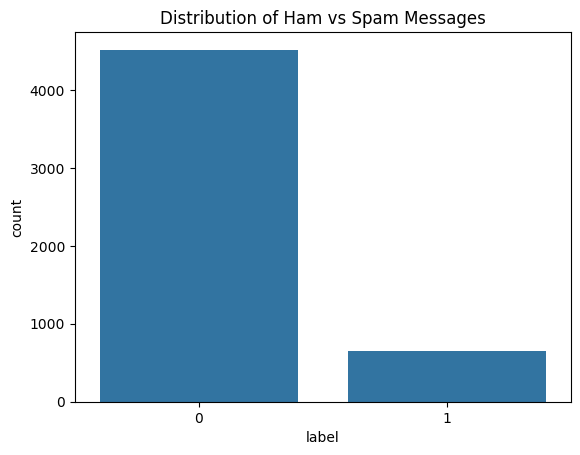

In [17]:
sns.countplot(x='label', data=df2)
plt.title('Distribution of Ham vs Spam Messages')
plt.show()

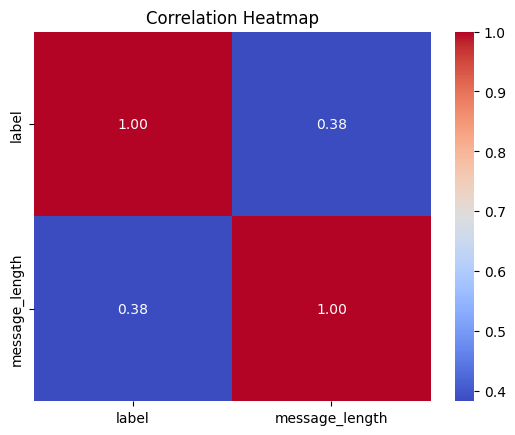

In [18]:
df2['message_length'] = df2['cleaned_text'].apply(len)
correlation_matrix = df2[['label', 'message_length']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

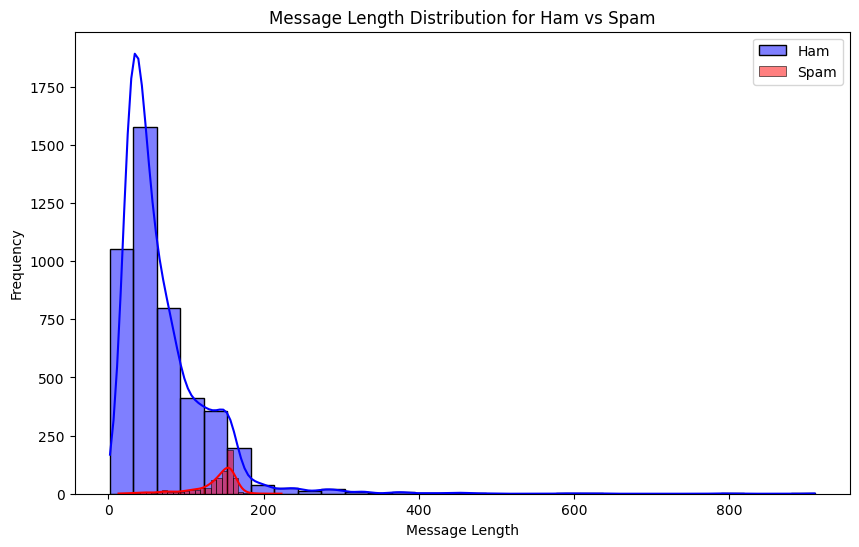

In [19]:
# Message length distribution
df2['message_length'] = df2['cleaned_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df2[df2['label'] == 0]['message_length'], color='blue', kde=True, label='Ham', bins=30)
sns.histplot(df2[df2['label'] == 1]['message_length'], color='red', kde=True, label='Spam', bins=30)
plt.title('Message Length Distribution for Ham vs Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-20-66a6629a2f90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='message_length', data=df2, palette=['blue', 'red'])


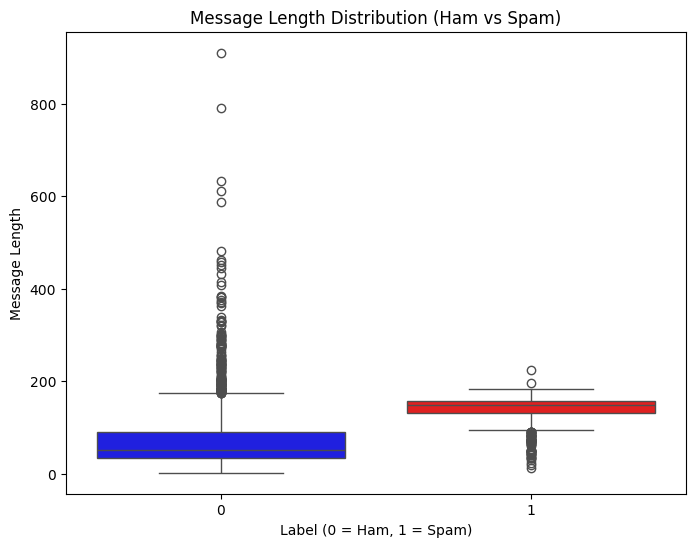

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='message_length', data=df2, palette=['blue', 'red'])
plt.title('Message Length Distribution (Ham vs Spam)')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Message Length')
plt.show()


### Model

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(df2['cleaned_text']).toarray()

In [22]:
from sklearn.model_selection import train_test_split
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# we will use svm for this case

from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [33]:
y_pred = svm.predict(X_test)

### Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9813023855577047


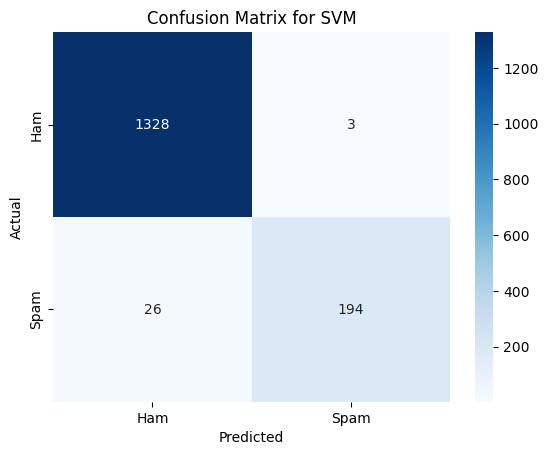

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1331
           1       0.98      0.88      0.93       220

    accuracy                           0.98      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



### Validation

In [42]:
import numpy as np
import re
def preprocess_message(message, vectorizer):
    message_cleaned = re.sub('[^a-zA-Z]', ' ', message).lower()
    message_cleaned = ' '.join(message_cleaned.split())
    message_vectorized = vectorizer.transform([message_cleaned]).toarray()
    return message_vectorized
    
new_message = "You've won a free ticket to Goa. Text WON to claim."

new_message_vectorized = preprocess_message(new_message, tfidf_vectorizer)

prediction = svm.predict(new_message_vectorized)
result = 'Spam' if prediction[0] == 1 else 'Ham'

print(f"The message is classified as: {result}")


The message is classified as: Spam


In [43]:
def preprocess_message(message, vectorizer):
    message_cleaned = re.sub('[^a-zA-Z]', ' ', message).lower()
    message_cleaned = ' '.join(message_cleaned.split())
    
    message_vectorized = vectorizer.transform([message_cleaned]).toarray()
    return message_vectorized

new_message = "How are you"
new_message_vectorized = preprocess_message(new_message, tfidf_vectorizer)

prediction = svm.predict(new_message_vectorized)

result = 'Spam' if prediction[0] == 1 else 'Ham'

print(f"The message is classified as: {result}")


The message is classified as: Ham
